In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 2024-12-04 18:29:52 Wednesday

@author: Nikhil Kapila
"""

import torch, torchvision, mlflow, sys, os
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
sys.path.append(os.path.abspath(os.path.join(os.getcwd(),'..')))
from utils.model_loader import MLFlowModelLoader

In [2]:
def test_some(model, data, num_images=5):
    transform=transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomCrop(32, padding=4),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ])
    import random
    index = random.sample(range(len(data)), num_images)
    model.eval()
    for i in index:
        image, label = data[i]
        input = transform(image).unsqueeze(0)
        with torch.no_grad():
            output = model(input)
            predicted = output.argmax().item()

            plt.figure(figsize=(1,1))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
            print(f'predicted: {predicted}')
            print(f'label: {label}')

def test_some_gradcam(model1, model2, data, num_images=5):
    transform=transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomCrop(32, padding=4),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ])
    import random
    index = random.sample(range(len(data)), num_images)
    model1.eval()
    model2.eval()

    grad_cam1 = GradCAM(model=model1, target_layers=[model1.layer1[-1]])
    grad_cam2 = GradCAM(model=model2, target_layers=[model2.layer1[-1]])

    for i in index:
        image, label = data[i]
        input = transform(image).unsqueeze(0)

        with torch.no_grad():
            output1 = model1(input)
            predicted1 = output1.argmax().item()
            output2 = model2(input)
            predicted2 = output2.argmax().item()

            # Grad-CAM heatmaps
        grayscale_cam1 = grad_cam1(input_tensor=input)
        grayscale_cam2 = grad_cam2(input_tensor=input)

        # heatmap1 = show_cam_on_image(image.permute(1, 2, 0).numpy(), grayscale_cam1[0], use_rgb=True)
        # heatmap2 = show_cam_on_image(image.permute(1, 2, 0).numpy(), grayscale_cam2[0], use_rgb=True)

        # Plot the results
        plt.figure(figsize=(10, 6))

        # Original Image
        plt.subplot(2, 3, 1)
        plt.imshow(image)

        plt.title(f"Original Image\nLabel: {label}")
        plt.axis("off")

        # # Model 1 Grad-CAM
        # plt.subplot(2, 3, 2)
        # plt.imshow(heatmap1)
        # plt.title(f"Model 1 Grad-CAM\nPredicted: {predicted1}")
        # plt.axis("off")

        # # Model 2 Grad-CAM
        # plt.subplot(2, 3, 3)
        # plt.imshow(heatmap2)
        # plt.title(f"Model 2 Grad-CAM\nPredicted: {predicted2}")
        # plt.axis("off")

        # Model 1 Prediction Only
        plt.subplot(2, 3, 4)
        plt.imshow(image)
        plt.title(f"Model 1\nPrediction: {predicted1}")
        plt.axis("off")

        # Model 2 Prediction Only
        plt.subplot(2, 3, 5)
        plt.imshow(image)
        plt.title(f"Model 2\nPrediction: {predicted2}")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

            # plt.figure(figsize=(1,1))
            # plt.imshow(image)
            # plt.axis('off')
            # plt.show()
            # print(f'predicted: {predicted}')
            # print(f'label: {label}')

def load_data(name='CIFAR-10'):
    if name == 'CIFAR-10':
        train_set = torchvision.datasets.CIFAR10(root='../data',
                                                 train=True,
                                                 download=True)
    return train_set

transform=transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomCrop(32, padding=4),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ])

## Models Loading

In [3]:
from models.cifar10resnet import Cifar10ResNet
from models.resnet_self_att import ResnetSelfAtt
from models.resnet_multi_head_att import ResnetMultiHeadAtt
from models.original_basic_block import OriginalBasicBlock

In [ ]:
base_model = Cifar10ResNet(
    OriginalBasicBlock,
    [3, 3, 3],
    10
)

loader = MLFlowModelLoader(run_id='8da960ad489b42fc8594b98d6daffc86', 
                           experiment_id='394260821350326426',
                           tracking_uri='', False)

resnet20 = loader.load_weights(base_model)

It seems that the model for this run was not logged.
[Errno 2] No such file or directory: '/Users/nkapila6/Code/CNNtention/mlruns/394260821350326426/8da960ad489b42fc8594b98d6daffc86/artifacts/model/data'
Object params.pth loaded.


/Users/nkapila6/Code/CNNtention/utils/model_loader.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  object.load_state_dict(torch.load(path, map_location=torch.device(dev

In [8]:
type(resnet20).__name__

'Cifar10ResNet'

In [10]:
self_att_model = ResnetSelfAtt(OriginalBasicBlock,
                               [3, 3, 3],
                               10
                               )

loader2 = MLFlowModelLoader(run_id='e424cebd75384e3e85c854098d60f3d2',
                           experiment_id='833036032974162673',
                           tracking_uri='',
                           ui_open=False)

resnet20selfatt = loader2.load_weights(self_att_model)

Object params.pth loaded.


/Users/nkapila6/Code/CNNtention/utils/model_loader.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  object.load_state_dict(torch.load(path, map_location=torch.device(dev

In [11]:
type(resnet20selfatt).__name__

'ResnetSelfAtt'

In [12]:
multi_head_att = ResnetMultiHeadAtt(OriginalBasicBlock,
                               [3, 3, 3],
                               10
                               )

loader3 = MLFlowModelLoader(run_id='64b2f1d30ba9435c9d388ffa9de05176',
                           experiment_id='276308263984292219',
                           tracking_uri='',
                           ui_open=False)

resnet20mhatt = loader3.load_weights(multi_head_att)

Object params.pth loaded.


/Users/nkapila6/Code/CNNtention/utils/model_loader.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  object.load_state_dict(torch.load(path, map_location=torch.device(dev

In [13]:
type(resnet20mhatt).__name__

'ResnetMultiHeadAtt'

Files already downloaded and verified
14898


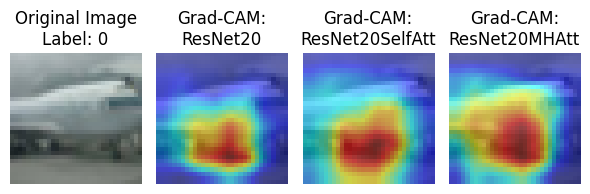

In [ ]:
# https://jacobgil.github.io/pytorch-gradcam-book/introduction.html#using-from-code-as-a-library

import numpy as np
train = load_data()
resnet20_target = [resnet20.layer3[-1]]
resnet20_selfatt_target = [resnet20selfatt.layer3[-1]]
resnet20_mhatt_target = [resnet20mhatt.layer3[-1]]
# target_layers = [resnet20.layer3[-1], resnet20selfatt.layer3[-1]]
# Create an input tensor image for your model..
import random
index = random.sample(range(len(train)), 1)[0]
image, label = train[index]
input_tensor = transform(image).unsqueeze(0)
# Note: input_tensor can be a batch tensor with several images!

# Construct the CAM object once, and then re-use it on many images:
cam1 = GradCAM(model=resnet20, target_layers=resnet20_target) #, use_cuda=args.use_cuda)
cam2 = GradCAM(model=resnet20selfatt, target_layers=resnet20_selfatt_target) #, use_cuda=args.use_cuda)
cam3 = GradCAM(model=resnet20mhatt, target_layers=resnet20_mhatt_target) #, use_cuda=args.use_cuda)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
targets = [ClassifierOutputTarget(label)]

grayscale_cam1 = cam1(input_tensor=input_tensor, targets=targets)[0]  # First image in the batch
grayscale_cam2 = cam2(input_tensor=input_tensor, targets=targets)[0]
grayscale_cam3 = cam3(input_tensor=input_tensor, targets=targets)[0]

# Convert the original image to a numpy array (normalized to [0, 1] for display)
rgb_img = np.array(image) / 255.0  # Convert PIL image to numpy array

# Create visualizations
visualization1 = show_cam_on_image(rgb_img, grayscale_cam1, use_rgb=True)
visualization2 = show_cam_on_image(rgb_img, grayscale_cam2, use_rgb=True)
visualization3 = show_cam_on_image(rgb_img, grayscale_cam3, use_rgb=True)

print(index)
# Plot the results
plt.figure(figsize=(6,6))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(rgb_img)
plt.title(f"Original Image\nLabel: {label}")
plt.axis("off")

# Grad-CAM visualization for resnet20
plt.subplot(1, 4, 2)
plt.imshow(visualization1)
plt.title(f"Grad-CAM:\nResNet20")
plt.axis("off")

# Grad-CAM visualization for resnet20selfatt
plt.subplot(1, 4, 3)
plt.imshow(visualization2)
plt.title(f"Grad-CAM:\nResNet20SelfAtt")
plt.axis("off")

# Grad-CAM visualization for resnet20mha
plt.subplot(1, 4, 4)
plt.imshow(visualization3)
plt.title(f"Grad-CAM:\nResNet20MHAtt")
plt.axis("off")

plt.tight_layout()
plt.show()